In [86]:
from heapq import merge
from statistics import correlation

import kagglehub
from IPython.lib.deepreload import original_reload

# Download latest version
path = kagglehub.dataset_download("psparks/instacart-market-basket-analysis")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\ROG STRIX\.cache\kagglehub\datasets\psparks\instacart-market-basket-analysis\versions\1


In [126]:
import pandas as pd
import numpy as np

In [88]:
aisles = pd.read_csv(path + "/aisles.csv")
departments = pd.read_csv(path + "/departments.csv")
orders = pd.read_csv(path + "/orders.csv")
order_products__prior = pd.read_csv(path + "/order_products__prior.csv")
order_products__train = pd.read_csv(path + "/order_products__train.csv")
products = pd.read_csv(path + "/products.csv")

In [89]:
print("shape of aisles:",aisles.shape)
print("shape of departments:",departments.shape)
print("shape of order_products__prior:",order_products__prior.shape)
print("shape of order_products__train:",order_products__train.shape)
print("shape of orders:",orders.shape)
print("shape of products:",products.shape)

shape of aisles: (134, 2)
shape of departments: (21, 2)
shape of order_products__prior: (32434489, 4)
shape of order_products__train: (1384617, 4)
shape of orders: (3421083, 7)
shape of products: (49688, 4)


In [90]:
print("aisles exploration:")
print(aisles.head())
print(aisles.tail())
print(aisles.info())

aisles exploration:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
     aisle_id                       aisle
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [91]:
print("departments exploration:")
print(departments.head())
print(departments.tail())
print(departments.info())

departments exploration:
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
    department_id department
16             17  household
17             18     babies
18             19     snacks
19             20       deli
20             21    missing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


In [92]:
print("order_products__prior exploration:")
print(order_products__prior.head())
print(order_products__prior.tail())
print(order_products__prior.info())

order_products__prior exploration:
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
          order_id  product_id  add_to_cart_order  reordered
32434484   3421083       39678                  6          1
32434485   3421083       11352                  7          0
32434486   3421083        4600                  8          0
32434487   3421083       24852                  9          1
32434488   3421083        5020                 10          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reorde

In [93]:
print("order_products__train exploration:")
print(order_products__train.head())
print(order_products__train.tail())
print(order_products__train.info())

order_products__train exploration:
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
         order_id  product_id  add_to_cart_order  reordered
1384612   3421063       14233                  3          1
1384613   3421063       35548                  4          1
1384614   3421070       35951                  1          1
1384615   3421070       16953                  2          1
1384616   3421070        4724                  3          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1

In [133]:
print("orders exploration:")
print(orders.head())
print(orders.tail())
print(orders.info())
print(orders.eval_set.unique())

orders exploration:
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
         order_id  user_id eval_set  order_number  order_dow  \
3421078   2266710   206209    prior            10          5   
3421079   1854736   206209    prior            11          4   
3421080    626363   206209    prior            12          1   
3421081   2977660   206209    prior            13          1   
3421082    272231   206209   

In [95]:
print("products exploration:")
print(products.head())
print(products.tail())
print(products.info())

products exploration:
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
       product_id                                product_name  aisle_id  \
49683       49684   Vodka, Triple Distilled, Twist of Vanilla       124   
49684       49685          En Croute Roast Hazelnut Cranberry        42   
49685       49686                            Artisan Baguette       112   
49686       49687  Smartblend Healthy Metabolism Dry Cat Food        41   
49687       49688   

In [154]:
static_info = pd.merge(products, aisles, on='aisle_id')
static_info =  pd.merge(static_info, departments, on='department_id')
print(static_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB
None


In [155]:
merged_prior = pd.merge(static_info, order_products__prior, on='product_id')
merged_prior = pd.merge(merged_prior, orders, on='order_id')
merged_prior.head()
merged_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   aisle                   object 
 5   department              object 
 6   order_id                int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.6+ GB


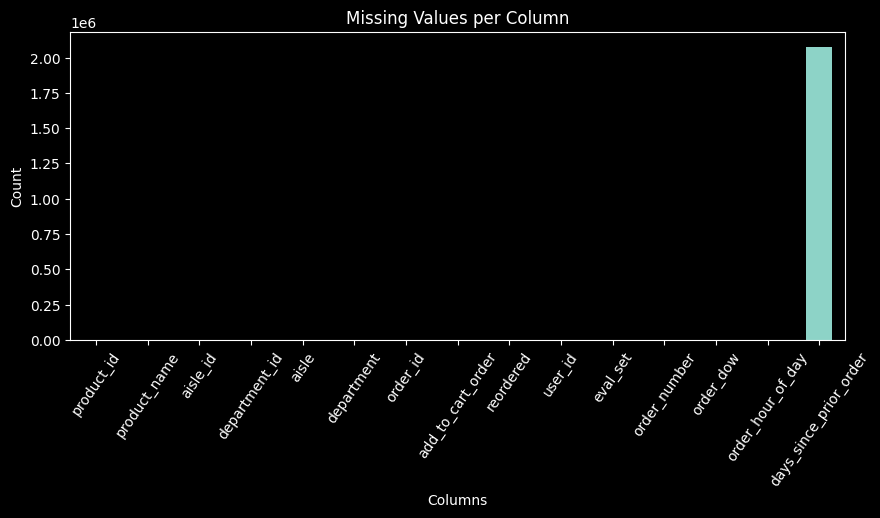

In [159]:
#Missing value analysis and visualization
import matplotlib.pyplot as plt
missing_count = merged_prior.isna().sum()
plt.figure(figsize=(10, 4))
missing_count.plot(kind="bar")
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xlabel("Columns")
plt.xticks(rotation=55)
plt.show()

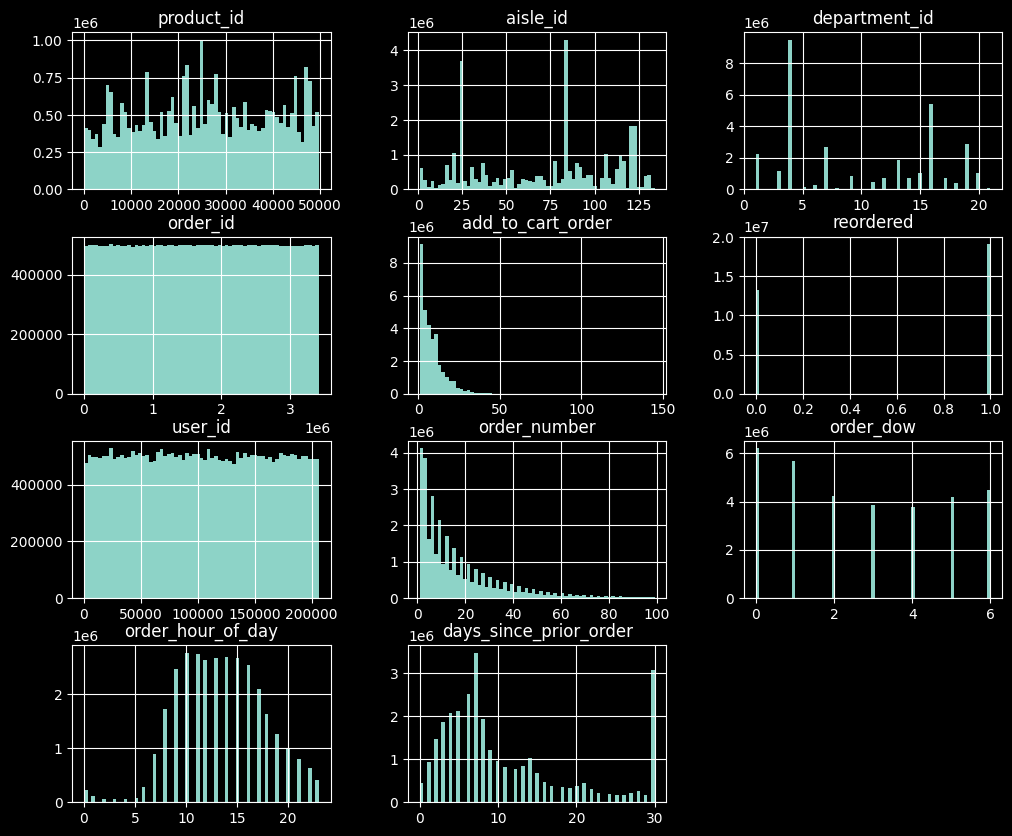

In [160]:
merged_prior.hist(figsize=(12, 10), bins=65)
plt.show()

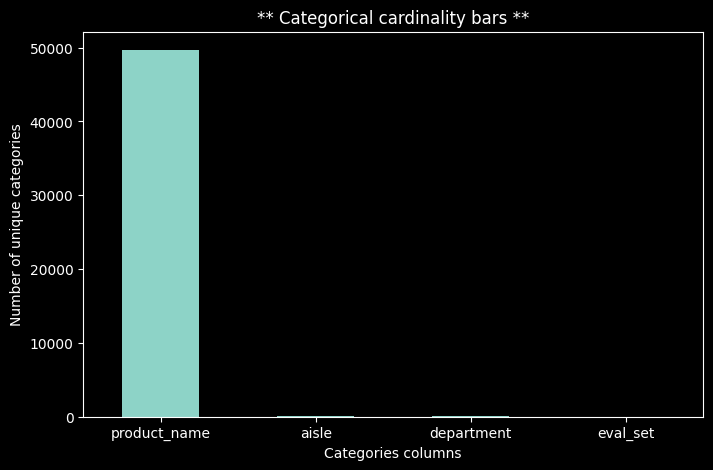

In [196]:
cat_cols = merged_prior.select_dtypes(include=["object"]).columns
cardinality = merged_prior[cat_cols].nunique().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
cardinality.plot(kind="bar")
plt.title("** Categorical cardinality bars **")
plt.ylabel("Number of unique categories")
plt.xlabel("Categories columns")
plt.xticks(rotation=0)
plt.show()

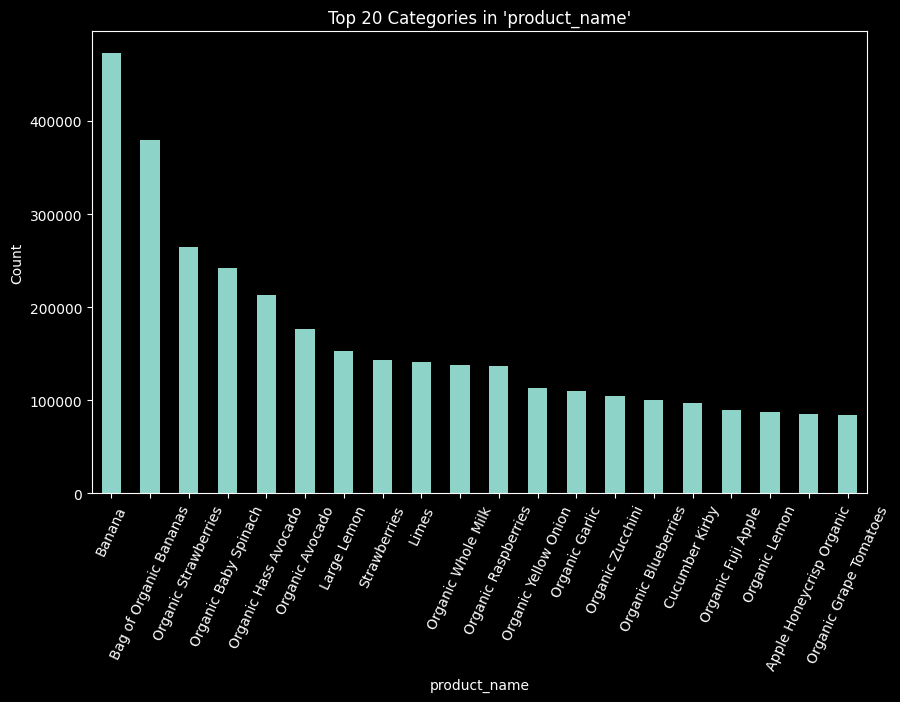

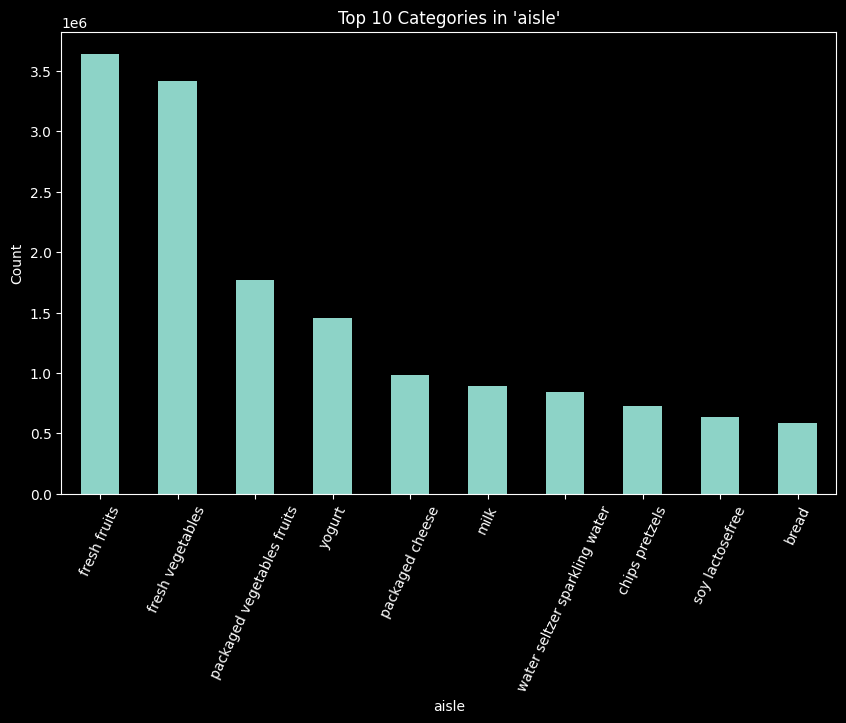

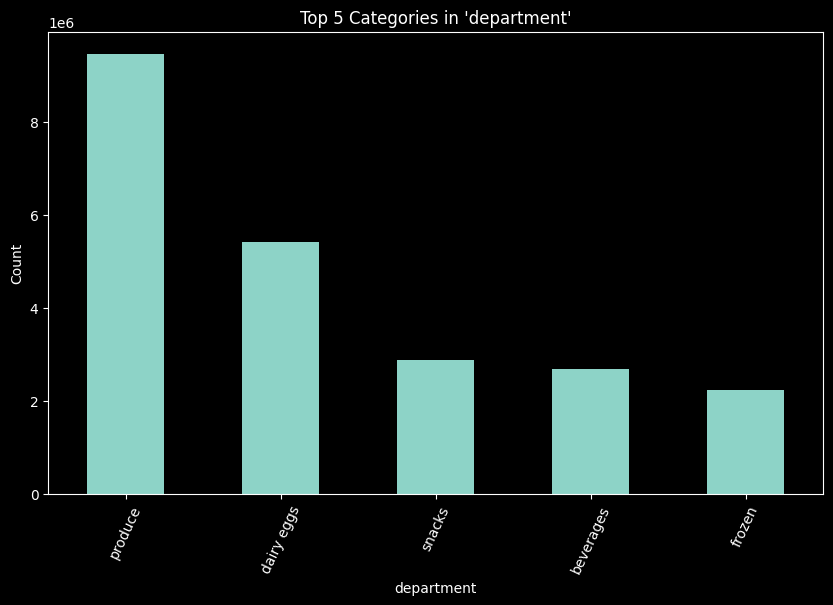

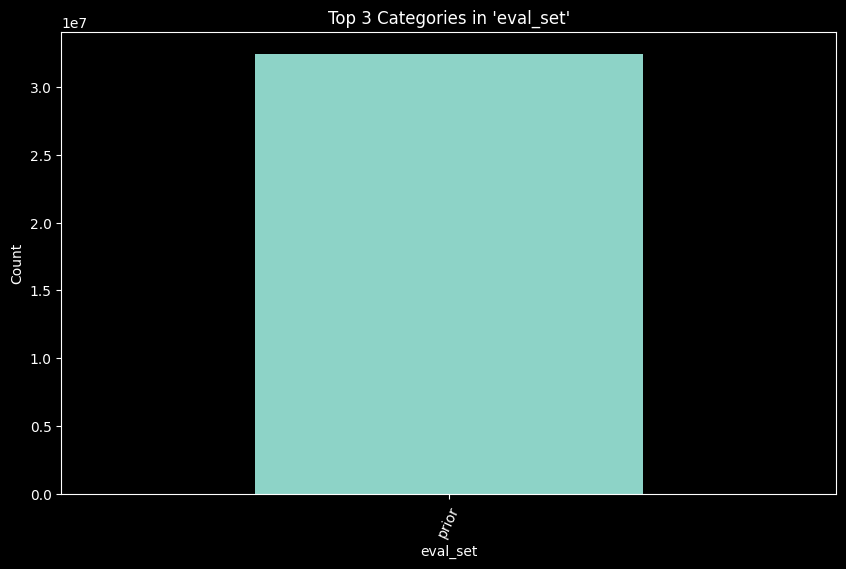

In [178]:
def plot_top_k(ds, col, k=10):
    top_k = ds[col].value_counts().head(k)
    plt.figure(figsize=(10, 6))
    top_k.plot(kind="bar")
    plt.title(f"Top {k} Categories in '{col}'")
    plt.ylabel("Count")
    plt.xticks(rotation=65)
    plt.show()
plot_top_k(merged_prior, "product_name", 20)
plot_top_k(merged_prior, "aisle")
plot_top_k(merged_prior, "department", 5)
plot_top_k(merged_prior, "eval_set", 3)

In [187]:
#num_cols = merged_prior.select_dtypes(include=["int64", "float64"])
corr_matrix = num_cols.corr(numeric_only=True)
corr_matrix

,product_id,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
product_id,1.000000,0.002254,-0.028503,-0.000082,0.005529,0.003718,0.000080,-0.001925,-0.002350,0.000942,0.000800
aisle_id,0.002254,1.000000,0.062203,-0.000063,0.009451,0.003924,-0.000114,-0.000293,-0.001997,-0.001134,0.005960
department_id,-0.028503,0.062203,1.000000,-0.000229,0.029437,-0.039371,0.000056,0.000529,0.004398,-0.008837,0.000567
order_id,-0.000082,-0.000063,-0.000229,1.000000,-0.000320,-0.000253,-0.000482,-0.000543,0.001205,0.000652,0.000727
add_to_cart_order,0.005529,0.009451,0.029437,-0.000320,1.000000,-0.133024,0.000729,-0.004228,-0.009071,-0.014805,0.053951
reordered,0.003718,0.003924,-0.039371,-0.000253,-0.133024,1.000000,-0.000862,0.306840,-0.006949,-0.023300,-0.132814
user_id,0.000080,-0.000114,0.000056,-0.000482,0.000729,-0.000862,1.000000,-0.000768,-0.001630,-0.000415,0.000556
order_number,-0.001925,-0.000293,0.000529,-0.000543,-0.004228,0.306840,-0.000768,1.000000,0.015209,-0.040049,-0.358422
order_dow,-0.002350,-0.001997,0.004398,0.001205,-0.009071,-0.006949,-0.001630,0.015209,1.000000,0.012176,-0.030002
order_hour_of_day,0.000942,-0.001134,-0.008837,0.000652,-0.014805,-0.023300,-0.000415,-0.040049,0.012176,1.000000,0.003878
